In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS 
import plotly.graph_objs as go
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import scipy.stats as ss
import matplotlib_venn as venn
import re
#from plotly.offline import plot


#misc
import gc
import time
import warnings
import matplotlib.gridspec as gridspec
#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split


tokenizer=TweetTokenizer()
from nltk.stem.wordnet import WordNetLemmatizer 
nltk.download('wordnet')
lem = WordNetLemmatizer()

color = sns.color_palette()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jixusheng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [2]:
train=pd.read_csv("/Users/jixusheng/Documents/kaggle/train.csv")
test=pd.read_csv("/Users/jixusheng/Documents/kaggle/test.csv")
test_labels=pd.read_csv("/Users/jixusheng/Documents/kaggle/test_labels.csv")
test_labels_backup=pd.read_csv("/Users/jixusheng/Documents/kaggle/test_labels.csv")
test_not_used=test_labels[test_labels['toxic']==-1][test_labels['severe_toxic']==-1][test_labels['obscene']==-1][test_labels['threat']==-1][test_labels['insult']==-1][test_labels['identity_hate']==-1]
index_name=test_labels[(test_labels['toxic']==-1)&(test_labels['severe_toxic']==-1)&(test_labels['obscene']==-1)&(test_labels['threat']==-1)&(test_labels['insult']==-1)&(test_labels['identity_hate']==-1)].index
test_labels.drop(index_name , inplace=True)
new_test_labels=pd.merge(test_labels,test,how="left",on='id')

/Users/jixusheng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [23]:
# c=['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
#        'insult', 'identity_hate']
# train.to_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/haha.txt', index=False)

In [26]:
# train=pd.read_csv("/Users/jixusheng/Documents/kaggle/eda_nlp-master/haha.txt",names=c,header=0)

In [27]:
train.head(10)

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   
5  00025465d4725e87  "\n\nCongratulations from me as well, use the ...      0   
6  0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1   
7  00031b1e95af7921  Your vandalism to the Matt Shirvington article...      0   
8  00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...      0   
9  00040093b2687caa  alignment on this subject and which are contra...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  
5             0        0       0       0              0  
6             1        1       0       1              0  
7             0        0       0       0              0  
8             0        0       0       0              0  
9             0        0       0       0              0

In [3]:
train['clean']=train['toxic']+train['severe_toxic']+train['obscene']+train['threat']+train['insult']+train['identity_hate']
train['clean']=train['clean'].apply(lambda x:1 if x==0 else 0)

In [17]:
train=train.rename(columns={"severe_toxic":"severe"})

# Imbalanced problem

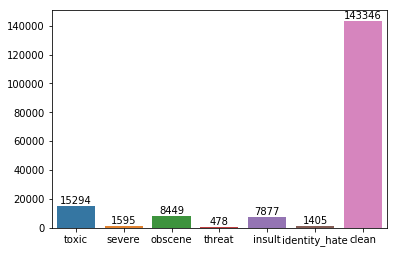

In [18]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
x=train.iloc[:,2:].sum()
ax= sns.barplot(x.index, x.values, alpha=0.99,linewidth=30.5,)

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 15, label, ha='center', va='bottom')
 

# Multi Label 

In [33]:
train['label_num']=train['toxic']+train['severe_toxic']+train['obscene']+train['threat']+train['insult']+train['identity_hate']

In [34]:
label_counts=train['label_num'].value_counts()
label_counts

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: label_num, dtype: int64

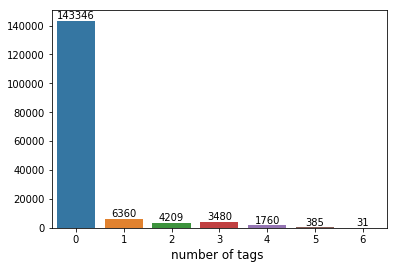

In [35]:
#plt.title("Multiple tags per comment")
#plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('number of tags ', fontsize=12)

ax= sns.barplot(label_counts.index, label_counts.values, alpha=0.99,linewidth=10.5,)
rects = ax.patches
labels = label_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 15, label, ha='center', va='bottom')

# Correlation between labels

In [36]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [37]:
import pandas as pd
import collections 
temp_df=train.iloc[:,2:]
temp_df
col1="toxic"
col2="severe_toxic"
col3="obscene"
col4="threat"
col5="insult"
col6="identity_hate"
cols=[]
#col1=[]
confusion_matrix = pd.crosstab(temp_df[col3], temp_df[col3])
#confusion_matrix = pd.crosstab(toxic["comment_text"], severe_toxic["comment_text"])
#print("Confusion matrix between toxic and severe toxic:")
#print(confusion_matrix)
new_corr=cramers_corrected_stat(confusion_matrix)
#print("The correlation between Toxic and Severe toxic using Cramer's stat=",new_corr)
cols.append(col1)
cols.append(col2)
cols.append(col3)
cols.append(col4)
cols.append(col5)
cols.append(col6)
mapper={}
for i in range(0,len(cols)):
    for j in range(1,len(cols)):
        confusion_matrix = pd.crosstab(temp_df[cols[i]], temp_df[cols[j]])
        new_corr=cramers_corrected_stat(confusion_matrix)
        #print("The correlation between {} and {} using Cramer's stat=".format(cols[i],cols[j]),new_corr)
        #mapper["The correlation between {} and {} using Cramer's stat=".format(cols[i],cols[j])]=new_corr
        message="The correlation between {} and {} using Cramer's stat".format(cols[i],cols[j])
        if (new_corr>=0.5) & (new_corr<=0.9):
            mapper[new_corr]=message


collections.OrderedDict(sorted(mapper.items(), key=lambda t: t[0],reverse=True))

        

OrderedDict([(0.7412059371540987,
              "The correlation between insult and obscene using Cramer's stat"),
             (0.6764644772231891,
              "The correlation between toxic and obscene using Cramer's stat"),
             (0.6474661802275932,
              "The correlation between toxic and insult using Cramer's stat")])

# Feature Selection

In [38]:
import string,re
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))
#Sentense count in each comment:

train['sent_num']=train["comment_text"].apply(lambda x: len(re.findall("\n",str(x)))+1)
range_sent_num=train['sent_num'].max()-train['sent_num'].min()
min_sent_num=train['sent_num'].min()
#train['sent_num_norm']=train['sent_num'].apply(lambda x: abs(x-train['sent_num'].mean())/train['sent_num'].std())
train['sent_num_norm']=train['sent_num'].apply(lambda x: abs(x-min_sent_num)/range_sent_num)
#train['sent_num'].loc[train['sent_num']>100] = 100

## Number of words in the text ##

train["num_words"] = train["comment_text"].apply(lambda x: len(str(x).split()))
range_num_words=train['num_words'].max()-train['num_words'].min()
min_num_words=train['sent_num'].min()
#train['num_words_norm']=train['num_words'].apply(lambda x: abs(x-train['num_words'].mean())/train['num_words'].std())
train['num_words_norm']=train['num_words'].apply(lambda x: abs(x-min_num_words)/range_num_words)
# #train['num_words'].loc[train['num_words']>150] = 150


## Number of char in the text ##

train["num_char"] = train["comment_text"].apply(lambda x: len(str(x)))
range_num_char=train['num_char'].max()-train['num_char'].min()
min_num_char=train['num_char'].min()
train['num_char_norm']=train['num_char'].apply(lambda x: abs(x-min_num_char)/range_num_char)
#train['num_char_norm']=train['num_char'].apply(lambda x: abs(x-train['num_char'].mean())/train['num_char'].std())
#train['num_char'].loc[train['num_char']>200] = 200

## Number of stopwords in the text ##
                                          
train["stop_words"] = train["comment_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
range_num_stop_words=train['stop_words'].max()-train['stop_words'].min()
min_num_stop_words=train['stop_words'].min()
#train['stop_words_norm']=train['stop_words'].apply(lambda x: abs(x-train['stop_words'].mean())/train['stop_words'].std())
train['stop_words_norm']=train['stop_words'].apply(lambda x: abs(x-min_num_stop_words)/range_num_stop_words)
#train['num_char '].loc[train['char ']>60] = 60

## Number of punctuation in the text ##
train["punctuation"] = train["comment_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in string.punctuation]))
range_punctuation=train['punctuation'].max()-train['punctuation'].min() 
min_punctuation=train['punctuation'].min()
#train['punctuation_norm']=train['punctuation'].apply(lambda x: abs(x-train['punctuation'].mean())/train['punctuation'].std())
train['punctuation_norm']=train['punctuation'].apply(lambda x: abs(x-train['punctuation'].min())/range_punctuation)
#train['num_char '].loc[train['char ']>60] = 60

## Number of upper in the text ##
train["upper"] = train["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
range_upper=train['upper'].max()-train['upper'].min()  
min_upper=train['upper'].min()
#train['upper_norm']=train['upper'].apply(lambda x:  abs(x-train['upper'].mean())/train['upper'].std())
train['upper_norm']=train['upper'].apply(lambda x: abs(x-min_upper)/range_upper)
#train['num_char '].loc[train['char ']>60] = 60

## Number of title in the text ##
train["title"] = train["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
range_title=train['title'].max()-train['title'].min()   
min_title=train['title'].min()
#train['title_norm']=train['title'].apply(lambda x:  abs(x-train['title'].mean())/train['title'].std())
train['title_norm']=train['title'].apply(lambda x: abs(x-min_title)/range_title)
#train['num_char '].loc[train['char ']>60] = 60

## Number of unique in the text ##
train["unique"] = train["comment_text"].apply(lambda x: len(set(str(x).split())))
range_unique=train['unique'].max()-train['unique'].min()
min_unique=train['unique'].min()
#train['unique_norm']=train['unique'].apply(lambda x:  abs(x-train['unique'].mean())/train['unique'].std())
train['unique_norm']=train['unique'].apply(lambda x: abs(x-min_unique)/range_unique)
#train['num_char '].loc[train['char ']>60] = 60

In [39]:
features = ('unique', 'title', 'upper', 'punctuation',
            'stop_words', 'num_char', 'sent_num')
columns = ('toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate')

rows = [{c:train[f].corr(train[c]) for c in columns} for f in features]
df_correlations = pd.DataFrame(rows, index=features)

In [40]:
df_correlations

toxic  severe_toxic   obscene    threat    insult  \
unique      -0.096256     -0.048377 -0.080942 -0.020279 -0.080960   
title       -0.053841     -0.006759 -0.043989 -0.004490 -0.046642   
upper        0.094123      0.145556  0.079580  0.039755  0.075260   
punctuation -0.085077     -0.038352 -0.071246 -0.020837 -0.073827   
stop_words  -0.062358     -0.010675 -0.052419 -0.008111 -0.051788   
num_char    -0.054470      0.010131 -0.042945 -0.008011 -0.045052   
sent_num    -0.010434      0.019784 -0.002749 -0.000248 -0.008845   

             identity_hate  
unique           -0.032796  
title            -0.019360  
upper             0.046290  
punctuation      -0.032896  
stop_words       -0.023537  
num_char         -0.013647  
sent_num          0.002479

In [41]:
import string,re
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))
#Sentense count in each comment:

new_test_labels['sent_num']=new_test_labels["comment_text"].apply(lambda x: len(re.findall("\n",str(x)))+1)
range_sent_num=new_test_labels['sent_num'].max()-new_test_labels['sent_num'].min()
min_sent_num=new_test_labels['sent_num'].min()
#new_test_labels['sent_num_norm']=new_test_labels['sent_num'].apply(lambda x: abs(x-new_test_labels['sent_num'].mean())/new_test_labels['sent_num'].std())
new_test_labels['sent_num_norm']=new_test_labels['sent_num'].apply(lambda x: abs(x-min_sent_num)/range_sent_num)
#new_test_labels['sent_num'].loc[new_test_labels['sent_num']>100] = 100

## Number of words in the text ##

new_test_labels["num_words"] = new_test_labels["comment_text"].apply(lambda x: len(str(x).split()))
range_num_words=new_test_labels['num_words'].max()-new_test_labels['num_words'].min()
min_num_words=new_test_labels['sent_num'].min()
#new_test_labels['num_words_norm']=new_test_labels['num_words'].apply(lambda x: abs(x-new_test_labels['num_words'].mean())/new_test_labels['num_words'].std())
new_test_labels['num_words_norm']=new_test_labels['num_words'].apply(lambda x: abs(x-min_num_words)/range_num_words)
# #new_test_labels['num_words'].loc[new_test_labels['num_words']>150] = 150


## Number of char in the text ##

new_test_labels["num_char"] = new_test_labels["comment_text"].apply(lambda x: len(str(x)))
range_num_char=new_test_labels['num_char'].max()-new_test_labels['num_char'].min()
min_num_char=new_test_labels['num_char'].min()
new_test_labels['num_char_norm']=new_test_labels['num_char'].apply(lambda x: abs(x-min_num_char)/range_num_char)
#new_test_labels['num_char_norm']=new_test_labels['num_char'].apply(lambda x: abs(x-new_test_labels['num_char'].mean())/new_test_labels['num_char'].std())
#new_test_labels['num_char'].loc[new_test_labels['num_char']>200] = 200

## Number of stopwords in the text ##
                                          
new_test_labels["stop_words"] = new_test_labels["comment_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
range_num_stop_words=new_test_labels['stop_words'].max()-new_test_labels['stop_words'].min()
min_num_stop_words=new_test_labels['stop_words'].min()
#new_test_labels['stop_words_norm']=new_test_labels['stop_words'].apply(lambda x: abs(x-new_test_labels['stop_words'].mean())/new_test_labels['stop_words'].std())
new_test_labels['stop_words_norm']=new_test_labels['stop_words'].apply(lambda x: abs(x-min_num_stop_words)/range_num_stop_words)
#new_test_labels['num_char '].loc[new_test_labels['char ']>60] = 60

## Number of punctuation in the text ##
new_test_labels["punctuation"] = new_test_labels["comment_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in string.punctuation]))
range_punctuation=new_test_labels['punctuation'].max()-new_test_labels['punctuation'].min() 
min_punctuation=new_test_labels['punctuation'].min()
#new_test_labels['punctuation_norm']=new_test_labels['punctuation'].apply(lambda x: abs(x-new_test_labels['punctuation'].mean())/new_test_labels['punctuation'].std())
new_test_labels['punctuation_norm']=new_test_labels['punctuation'].apply(lambda x: abs(x-new_test_labels['punctuation'].min())/range_punctuation)
#new_test_labels['num_char '].loc[new_test_labels['char ']>60] = 60

## Number of upper in the text ##
new_test_labels["upper"] = new_test_labels["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
range_upper=new_test_labels['upper'].max()-new_test_labels['upper'].min()  
min_upper=new_test_labels['upper'].min()
#new_test_labels['upper_norm']=new_test_labels['upper'].apply(lambda x:  abs(x-new_test_labels['upper'].mean())/new_test_labels['upper'].std())
new_test_labels['upper_norm']=new_test_labels['upper'].apply(lambda x: abs(x-min_upper)/range_upper)
#new_test_labels['num_char '].loc[new_test_labels['char ']>60] = 60

## Number of title in the text ##
new_test_labels["title"] = new_test_labels["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
range_title=new_test_labels['title'].max()-new_test_labels['title'].min()   
min_title=new_test_labels['title'].min()
#new_test_labels['title_norm']=new_test_labels['title'].apply(lambda x:  abs(x-new_test_labels['title'].mean())/new_test_labels['title'].std())
new_test_labels['title_norm']=new_test_labels['title'].apply(lambda x: abs(x-min_title)/range_title)
#new_test_labels['num_char '].loc[new_test_labels['char ']>60] = 60

## Number of unique in the text ##
new_test_labels["unique"] = new_test_labels["comment_text"].apply(lambda x: len(set(str(x).split())))
range_unique=new_test_labels['unique'].max()-new_test_labels['unique'].min()
min_unique=new_test_labels['unique'].min()
#new_test_labels['unique_norm']=new_test_labels['unique'].apply(lambda x:  abs(x-new_test_labels['unique'].mean())/new_test_labels['unique'].std())
new_test_labels['unique_norm']=new_test_labels['unique'].apply(lambda x: abs(x-min_unique)/range_unique)
#new_test_labels['num_char '].loc[new_test_labels['char ']>60] = 60

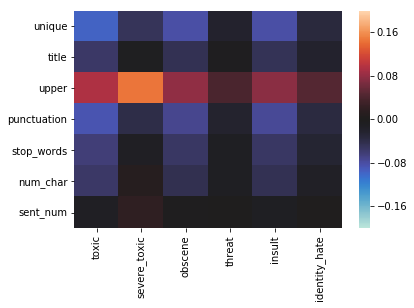

In [42]:

ax = sns.heatmap(df_correlations, vmin=-0.2, vmax=0.2, center=0.0)

# Leaky Feature



In [43]:
 ###### train
###ip
train['ip']=train["comment_text"].apply(lambda x: re.findall("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",str(x)))
  #count of ip addresses
train['count_ip']=train["ip"].apply(lambda x: len(x))  

##test 
###ip
new_test_labels['ip']=new_test_labels["comment_text"].apply(lambda x: re.findall("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",str(x)))
  #count of ip addresses
new_test_labels['count_ip']=new_test_labels["ip"].apply(lambda x: len(x))  


#######train
#links
train['link']=train["comment_text"].apply(lambda x: re.findall("http://.*com",str(x)))
#count of links
train['count_links']=train["link"].apply(lambda x: len(x))


##test 
#links
new_test_labels['link']=new_test_labels["comment_text"].apply(lambda x: re.findall("http://.*com",str(x)))
#count of links
new_test_labels['count_links']=new_test_labels["link"].apply(lambda x: len(x))





#####train
#article ids
train['article_id']=train["comment_text"].apply(lambda x: re.findall("\d:\d\d\s{0,5}$",str(x)))
train['article_id_flag']=train.article_id.apply(lambda x: len(x))

#####test
#article ids
new_test_labels['article_id']=new_test_labels["comment_text"].apply(lambda x: re.findall("\d:\d\d\s{0,5}$",str(x)))
new_test_labels['article_id_flag']=new_test_labels.article_id.apply(lambda x: len(x))

##train
#user name
train['username']=train["comment_text"].apply(lambda x: re.findall("\[\[User(.*)\|",str(x)))
train['username_nums']=train["username"].apply(lambda x: len(x))

##test
#user name
new_test_labels['username']=new_test_labels["comment_text"].apply(lambda x: re.findall("\[\[User(.*)\|",str(x)))
new_test_labels['username_nums']=new_test_labels["username"].apply(lambda x: len(x))

# Leaky username
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
cv = CountVectorizer()
count_feats_ip = cv.fit_transform(train["username"].apply(lambda x : str(x))) 


cv = CountVectorizer()
count_feats_user = cv.fit_transform(train["username"].apply(lambda x : str(x)))


leaky_feats_train=train[["ip","link","article_id","username","count_ip","count_links","username_nums","article_id_flag"]]
leaky_feats_test=new_test_labels[["ip","link","article_id","username","count_ip","count_links","username_nums","article_id_flag"]]

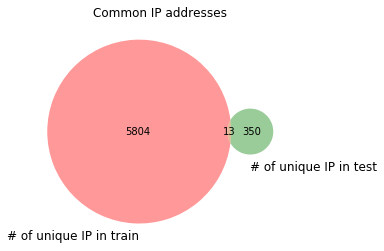

In [44]:
#filterout the entries without ips
train_ips=leaky_feats_train.ip[leaky_feats_train.count_ip!=0]
test_ips=leaky_feats_test.ip[leaky_feats_test.count_ip!=0]
#get the unique list of ips in test and train datasets
train_ip_list=list(set([a for b in train_ips.tolist() for a in b]))
test_ip_list=list(set([a for b in test_ips.tolist() for a in b]))

# get common elements
common_ip_list=list(set(train_ip_list).intersection(test_ip_list))
plt.title("Common IP addresses")
venn.venn2(subsets=(len(train_ip_list),len(test_ip_list),len(common_ip_list)),set_labels=("# of unique IP in train","# of unique IP in test"))
plt.show()

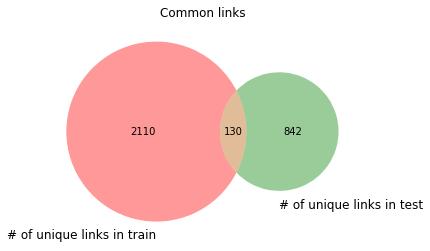

In [45]:
#filterout the entries without links
train_links=leaky_feats_train.link[leaky_feats_train.count_links!=0]
test_links=leaky_feats_test.link[leaky_feats_test.count_links!=0]
#get the unique list of ips in test and train datasets
train_links_list=list(set([a for b in train_links.tolist() for a in b]))
test_links_list=list(set([a for b in test_links.tolist() for a in b]))

# get common elements
common_links_list=list(set(train_links_list).intersection(test_links_list))
plt.title("Common links")
venn.venn2(subsets=(len(train_links_list),len(test_links_list),len(common_links_list)),
           set_labels=("# of unique links in train","# of unique links in test"))
plt.show()

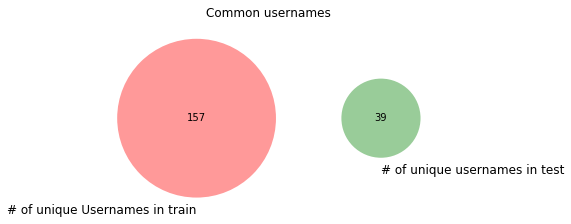

In [46]:
#filterout the entries without users
train_users=leaky_feats_train.username[leaky_feats_train.username_nums!=0]
test_users=leaky_feats_test.username[leaky_feats_test.username_nums!=0]
#get the unique list of ips in test and train datasets
train_users_list=list(set([a for b in train_users.tolist() for a in b]))
test_users_list=list(set([a for b in test_users.tolist() for a in b]))

# get common elements
common_users_list=list(set(train_users_list).intersection(test_users_list))
plt.title("Common usernames")
venn.venn2(subsets=(len(train_users_list),len(test_users_list),len(common_users_list)),
           set_labels=("# of unique Usernames in train","# of unique usernames in test"))
plt.show()

# Clean the Data

In [47]:
#https://drive.google.com/file/d/0B1yuv8YaUVlZZ1RzMFJmc1ZsQmM/view
# Aphost lookup dict
APPO = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"
}

In [48]:
def clean(comment):
    """
    This function receives comments and returns clean word-list
    """
    # Convert to lower case , so that Hi and hi are the same
    comment = comment.lower()

    # remove \n
    comment = re.sub("\\n", "", comment)

    comment = re.sub("\:", "", comment)

    comment = re.sub("\==", "", comment)

    #     # remove leaky elements like ip,user
    comment = re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}", "", comment)
    # removing usernames
    comment = re.sub("\[\[User(.*)\]", "", comment)

    # Split the sentences into words
    words = tokenizer.tokenize(comment)

    #     # (')aphostophe  replacement (ie)   you're --> you are
    #     # ( basic dictionary lookup : master dictionary present in a hidden block of code)
    words = [APPO[word] if word in APPO else word for word in words]
    words = [lem.lemmatize(word, "v") for word in words]
    #words = [w for w in words if not w in eng_stopwords]

    clean_sent = " ".join(words)
    # remove any non alphanum,digit character
    clean_sent = re.sub("\W+", " ", clean_sent)
    clean_sent = re.sub("  ", " ", clean_sent)
    return (clean_sent)

In [49]:
train['clean_comment_text']=train['comment_text'].apply(lambda x :clean(x))


# prepare the input data for Data Augmentation for balancing data

In [50]:
 
new_test_labels['clean_comment_text']=new_test_labels['comment_text'].apply(lambda x :clean(x))

In [51]:
# last_mask_str = '1111111'
# last_mask_str = int(last_mask_str, 2)
# last_mask_str 
new_test_labels.columns

Index(['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate', 'comment_text', 'sent_num', 'sent_num_norm',
       'num_words', 'num_words_norm', 'num_char', 'num_char_norm',
       'stop_words', 'stop_words_norm', 'punctuation', 'punctuation_norm',
       'upper', 'upper_norm', 'title', 'title_norm', 'unique', 'unique_norm',
       'ip', 'count_ip', 'link', 'count_links', 'article_id',
       'article_id_flag', 'username', 'username_nums', 'clean_comment_text'],
      dtype='object')

In [52]:
#train['id_and_clean_comment_text']=train['id'].str.cat(train['clean_comment_text'])


In [53]:
a=train['id'].apply(lambda x: len(x))
a.min()
train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'clean', 'label_num', 'sent_num',
       'sent_num_norm', 'num_words', 'num_words_norm', 'num_char',
       'num_char_norm', 'stop_words', 'stop_words_norm', 'punctuation',
       'punctuation_norm', 'upper', 'upper_norm', 'title', 'title_norm',
       'unique', 'unique_norm', 'ip', 'count_ip', 'link', 'count_links',
       'article_id', 'article_id_flag', 'username', 'username_nums',
       'clean_comment_text'],
      dtype='object')

In [54]:
#input1=train[(train['toxic']==1)&(train['identity_hate']!=1)&(train['severe_toxic']!=1)&(train['obscene']!=1)&(train['threat']!=1)&(train['insult']!=1)][['toxic','id','clean_comment_text','num_words']]
input1=train[train['toxic']==1][['toxic','id','clean_comment_text','num_words']]


input_larger_100=input1[input1['num_words']>100]
input_larger_100
input_less_100=input1[input1['num_words']<=100]
input_less_100

toxic                id  \
6           1  0002bcb3da6cb337   
12          1  0005c987bdfc9d4b   
16          1  0007e25b2121310b   
43          1  00190820581d90ce   
44          1  001956c382006abd   
...       ...               ...   
159449      1  fdce660ddcd6d7ca   
159493      1  fef142420a215b90   
159514      1  ff39a2895fc3b40e   
159541      1  ffa33d3122b599d6   
159554      1  ffbdbb0483ed0841   

                                       clean_comment_text  num_words  
6                             cocksucker piss around work          8  
12      hey talk exclusive group wp talibans good dest...         53  
16        bye do not look come think comming back tosser          10  
43                            fuck filthy mother ass dry           8  
44      I am sorry I am sorry screw around someones ta...         56  
...                                                   ...        ...  
159449                                     think gay fag           7  
159493                                fuck faggot lolwat           3  
159514                            mischievious pubic hair          6  
159541  absurd edit absurd edit great white shark tota...         58  
159554  I am go keep post stuff u delete fuck site clo...         35  

[13735 rows x 4 columns]

/Users/jixusheng/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



(array([771., 295., 117.,  71.,  51.,  33.,  32.,  21.,  31.,  27.,  24.,
         27.,  23.,  12.,   6.,   6.,   2.,   6.,   1.,   3.]),
 array([ 101. ,  166.5,  232. ,  297.5,  363. ,  428.5,  494. ,  559.5,
         625. ,  690.5,  756. ,  821.5,  887. ,  952.5, 1018. , 1083.5,
        1149. , 1214.5, 1280. , 1345.5, 1411. ]),
 <a list of 20 Patch objects>)

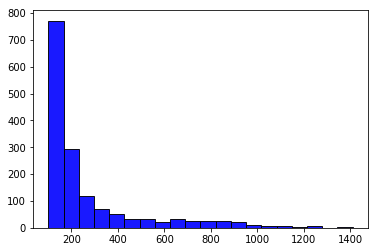

In [55]:
plt.hist(input_larger_100['num_words'], bins=20, normed=0, facecolor="blue", edgecolor="black", alpha=0.9)

(array([1658., 2460., 1885., 1454., 1101.,  897.,  739.,  610.,  536.,
         330.,  363.,  313.,  290.,  210.,  212.,  158.,  151.,  141.,
         126.,  101.]),
 array([  2. ,   6.9,  11.8,  16.7,  21.6,  26.5,  31.4,  36.3,  41.2,
         46.1,  51. ,  55.9,  60.8,  65.7,  70.6,  75.5,  80.4,  85.3,
         90.2,  95.1, 100. ]),
 <a list of 20 Patch objects>)

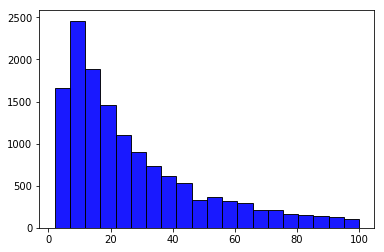

In [56]:
plt.hist(input_less_100['num_words'], bins=20, normed=0, facecolor="blue", edgecolor="black", alpha=0.9,xlab="sdsd")

In [57]:
len(input_less_100)

13735

In [58]:
len(input_larger_100)

1559

In [65]:
input_larger_100[['toxic','clean_comment_text','id']].to_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/input_larger_100.txt', sep='\t', index=False)

In [66]:
input_less_100[['toxic','clean_comment_text','id']].to_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/input_less_100.txt', sep='\t', index=False)

In [67]:
colnames=['toxic', 'clean_comment_text','id'] 
toxic_less_100 = pd.read_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/out_less_100.txt', sep='\t', header=None,names=colnames)
toxic_larger_100 = pd.read_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/out_larger_100.txt', sep='\t', header=None,names=colnames)

In [68]:
len(toxic_larger_100)

14031

In [70]:
len(toxic_less_100)

41205

In [71]:
new_test_labels_toxic_less=pd.merge(toxic_less_100,train,how="left",on='id')
new_test_labels_toxic_larger=pd.merge(toxic_larger_100,train,how="left",on='id')

In [72]:
new_test_labels_toxic_less.head(3)

toxic_x                  clean_comment_text_x                id  \
0        1                           around work  0002bcb3da6cb337   
1        1  cocksucker piss around dickhead work  0002bcb3da6cb337   
2        1           cocksucker piss around work  0002bcb3da6cb337   

                                   comment_text  toxic_y  severe_toxic  \
0  COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK        1             1   
1  COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK        1             1   
2  COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK        1             1   

   obscene  threat  insult  identity_hate  ...  unique_norm  ip  count_ip  \
0        1       0       1              0  ...     0.008589  []         0   
1        1       0       1              0  ...     0.008589  []         0   
2        1       0       1              0  ...     0.008589  []         0   

   link  count_links  article_id  article_id_flag  username  username_nums  \
0    []            0          []                0        []              0   
1    []            0          []                0        []              0   
2    []            0          []                0        []              0   

          clean_comment_text_y  
0  cocksucker piss around work  
1  cocksucker piss around work  
2  cocksucker piss around work  

[3 rows x 37 columns]

In [73]:
new_test_labels_toxic_larger.head(3)

toxic_x                               clean_comment_text_x  \
0        1  gay antisemmitian archangel off white tigermeo...   
1        1  gay antisemmitian archangel white tigermeow gr...   
2        1  gay antisemmitian archangel white tigermeow gr...   

                 id                                       comment_text  \
0  001810bf8c45bf5f  You are gay or antisemmitian? \n\nArchangel WH...   
1  001810bf8c45bf5f  You are gay or antisemmitian? \n\nArchangel WH...   
2  001810bf8c45bf5f  You are gay or antisemmitian? \n\nArchangel WH...   

   toxic_y  severe_toxic  obscene  threat  insult  identity_hate  ...  \
0        1             0        1       0       1              1  ...   
1        1             0        1       0       1              1  ...   
2        1             0        1       0       1              1  ...   

   unique_norm  ip  count_ip  link  count_links  article_id  article_id_flag  \
0     0.106748  []         0    []            0          []                0   
1     0.106748  []         0    []            0          []                0   
2     0.106748  []         0    []            0          []                0   

   username  username_nums                               clean_comment_text_y  
0        []              0  gay antisemmitian archangel white tigermeow gr...  
1        []              0  gay antisemmitian archangel white tigermeow gr...  
2        []              0  gay antisemmitian archangel white tigermeow gr...  

[3 rows x 37 columns]

In [74]:
new_test_labels_toxic_larger=new_test_labels_toxic_larger.drop(['toxic_x'], axis = 1) 
new_test_labels_toxic_larger=new_test_labels_toxic_larger.drop(['clean_comment_text_y'], axis = 1) 

new_test_labels_toxic_less=new_test_labels_toxic_less.drop(['toxic_x'], axis = 1) 
new_test_labels_toxic_less=new_test_labels_toxic_less.drop(['clean_comment_text_y'], axis = 1) 

In [75]:
new_test_labels_toxic_larger=new_test_labels_toxic_larger.rename(columns={"clean_comment_text_x":"clean_comment_text"})
new_test_labels_toxic_larger=new_test_labels_toxic_larger.rename(columns={"toxic_y":"toxic"})

new_test_labels_toxic_less=new_test_labels_toxic_less.rename(columns={"clean_comment_text_x":"clean_comment_text"})
new_test_labels_toxic_less=new_test_labels_toxic_less.rename(columns={"toxic_y":"toxic"})

In [76]:
new_test_labels_toxic_less.head(3)

clean_comment_text                id  \
0                           around work  0002bcb3da6cb337   
1  cocksucker piss around dickhead work  0002bcb3da6cb337   
2           cocksucker piss around work  0002bcb3da6cb337   

                                   comment_text  toxic  severe_toxic  obscene  \
0  COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1             1        1   
1  COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1             1        1   
2  COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1             1        1   

   threat  insult  identity_hate  clean  ...  unique  unique_norm  ip  \
0       0       1              0      0  ...       8     0.008589  []   
1       0       1              0      0  ...       8     0.008589  []   
2       0       1              0      0  ...       8     0.008589  []   

   count_ip  link  count_links  article_id  article_id_flag  username  \
0         0    []            0          []                0        []   
1         0    []            0          []                0        []   
2         0    []            0          []                0        []   

   username_nums  
0              0  
1              0  
2              0  

[3 rows x 35 columns]

In [77]:
new_test_labels_toxic_larger.head(3)

clean_comment_text                id  \
0  gay antisemmitian archangel off white tigermeo...  001810bf8c45bf5f   
1  gay antisemmitian archangel white tigermeow gr...  001810bf8c45bf5f   
2  gay antisemmitian archangel white tigermeow gr...  001810bf8c45bf5f   

                                        comment_text  toxic  severe_toxic  \
0  You are gay or antisemmitian? \n\nArchangel WH...      1             0   
1  You are gay or antisemmitian? \n\nArchangel WH...      1             0   
2  You are gay or antisemmitian? \n\nArchangel WH...      1             0   

   obscene  threat  insult  identity_hate  clean  ...  unique  unique_norm  \
0        1       0       1              1      0  ...      88     0.106748   
1        1       0       1              1      0  ...      88     0.106748   
2        1       0       1              1      0  ...      88     0.106748   

   ip  count_ip  link  count_links  article_id  article_id_flag  username  \
0  []         0    []            0          []                0        []   
1  []         0    []            0          []                0        []   
2  []         0    []            0          []                0        []   

   username_nums  
0              0  
1              0  
2              0  

[3 rows x 35 columns]

In [78]:
input1_severe_toxic=train[train['severe_toxic']==1][['severe_toxic','id','clean_comment_text','num_words']]

input1_severe_toxic_larger_100=input1_severe_toxic[input1_severe_toxic['num_words']>100]
input1_severe_toxic_larger_100
input1_severe_toxic_less_100=input1_severe_toxic[input1_severe_toxic['num_words']<=100]
input1_severe_toxic_less_100

severe_toxic                id  \
6                  1  0002bcb3da6cb337   
55                 1  0020e7119b96eeeb   
181                1  006e87872c8b370c   
442                1  01208d2b76624130   
579                1  018663f910e0bfe6   
...              ...               ...   
159096             1  f871b05d4caa6f20   
159099             1  f885a3e2d779342e   
159281             1  fb726deec64157bd   
159312             1  fbf20e312cd4a78d   
159400             1  fd052883fa6a8697   

                                       clean_comment_text  num_words  
6                             cocksucker piss around work          8  
55      stupid peace shit stop delete stuff asshole go...         19  
181                       stupid fuck mother s cunt stink         10  
442                                     hi im fuck bitch           6  
579          motherfucking piece crap fuckheads block us          11  
...                                                   ...        ...  
159096  filthy stink crow back dirty crow better delet...         44  
159099  nowyou fuck pathetic moron cc jimbo walesrootm...          9  
159281  lol you are gay never know good feel fuck woma...         18  
159312  walter mercado antonio quite frankly you are f...         25  
159400  shalom semite get fuck kill son bitch do not l...         96  

[1403 rows x 4 columns]

(array([43., 23., 13., 13., 12.,  9.,  8.,  5., 11.,  9.,  8., 11.,  9.,
         6.,  4.,  3.,  1.,  2.,  0.,  2.]),
 array([ 101. ,  166.1,  231.2,  296.3,  361.4,  426.5,  491.6,  556.7,
         621.8,  686.9,  752. ,  817.1,  882.2,  947.3, 1012.4, 1077.5,
        1142.6, 1207.7, 1272.8, 1337.9, 1403. ]),
 <a list of 20 Patch objects>)

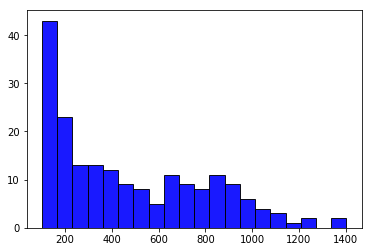

In [79]:
plt.hist(input1_severe_toxic_larger_100['num_words'], bins=20, normed=0, facecolor="blue", edgecolor="black", alpha=0.9)

(array([236., 324., 214., 151., 109.,  72.,  61.,  45.,  42.,  21.,  27.,
         20.,  20.,  12.,  16.,   8.,   4.,   6.,   7.,   8.]),
 array([  2. ,   6.9,  11.8,  16.7,  21.6,  26.5,  31.4,  36.3,  41.2,
         46.1,  51. ,  55.9,  60.8,  65.7,  70.6,  75.5,  80.4,  85.3,
         90.2,  95.1, 100. ]),
 <a list of 20 Patch objects>)

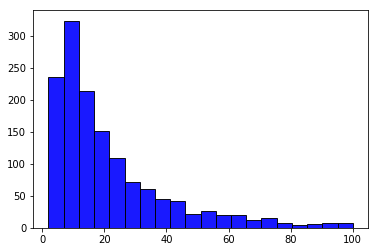

In [80]:
plt.hist(input1_severe_toxic_less_100['num_words'], bins=20, normed=0, facecolor="blue", edgecolor="black", alpha=0.9)

In [81]:
input1_severe_toxic_larger_100[['severe_toxic','clean_comment_text','id']].to_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/input_larger_100.txt', sep='\t', index=False)

In [82]:
input1_severe_toxic_less_100[['severe_toxic','clean_comment_text','id']].to_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/input_less_100.txt', sep='\t', index=False)

In [84]:
colnames=['severe_toxic', 'clean_comment_text','id'] 
severe_toxic_less_100 = pd.read_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/out_less_100.txt', sep='\t', header=None,names=colnames)
severe_toxic_larger_100 = pd.read_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/out_larger_100.txt', sep='\t', header=None,names=colnames)

In [85]:
len(severe_toxic_less_100)

7015

In [86]:
len(severe_toxic_larger_100)

1728

In [87]:
new_test_labels_severe_toxic_larger=pd.merge(severe_toxic_larger_100,train,how="left",on='id')
new_test_labels_severe_toxic_less=pd.merge(severe_toxic_less_100,train,how="left",on='id')

In [88]:
new_test_labels_severe_toxic_larger=new_test_labels_severe_toxic_larger.drop(['severe_toxic_x'], axis = 1) 
new_test_labels_severe_toxic_larger=new_test_labels_severe_toxic_larger.drop(['clean_comment_text_y'], axis = 1) 

new_test_labels_severe_toxic_less=new_test_labels_severe_toxic_less.drop(['severe_toxic_x'], axis = 1) 
new_test_labels_severe_toxic_less=new_test_labels_severe_toxic_less.drop(['clean_comment_text_y'], axis = 1) 

In [89]:
new_test_labels_severe_toxic_less=new_test_labels_severe_toxic_less.rename(columns={"clean_comment_text_x":"clean_comment_text"})
new_test_labels_severe_toxic_less=new_test_labels_severe_toxic_less.rename(columns={"severe_toxic_y":"severe_toxic"})

new_test_labels_severe_toxic_larger=new_test_labels_severe_toxic_larger.rename(columns={"clean_comment_text_x":"clean_comment_text"})
new_test_labels_severe_toxic_larger=new_test_labels_severe_toxic_larger.rename(columns={"severe_toxic_y":"severe_toxic"})

In [90]:
new_test_labels_severe_toxic_larger.head(2)

clean_comment_text                id  \
0  know think nobody really attack reveal age ann...  020316a0de9e0406   
1  know think nobody attack reveal age announce 1...  020316a0de9e0406   

                                        comment_text  toxic  severe_toxic  \
0  "You know, I was thinking...\n\nNobody really ...      1             1   
1  "You know, I was thinking...\n\nNobody really ...      1             1   

   obscene  threat  insult  identity_hate  clean  ...  unique  unique_norm  \
0        1       0       0              0      0  ...     180     0.219632   
1        1       0       0              0      0  ...     180     0.219632   

   ip  count_ip  link  count_links  article_id  article_id_flag  username  \
0  []         0    []            0          []                0        []   
1  []         0    []            0          []                0        []   

   username_nums  
0              0  
1              0  

[2 rows x 35 columns]

In [91]:
new_test_labels_severe_toxic_less.head(2)

clean_comment_text                id  \
0  work piss around cocksucker  0002bcb3da6cb337   
1         cocksucker piss work  0002bcb3da6cb337   

                                   comment_text  toxic  severe_toxic  obscene  \
0  COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1             1        1   
1  COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1             1        1   

   threat  insult  identity_hate  clean  ...  unique  unique_norm  ip  \
0       0       1              0      0  ...       8     0.008589  []   
1       0       1              0      0  ...       8     0.008589  []   

   count_ip  link  count_links  article_id  article_id_flag  username  \
0         0    []            0          []                0        []   
1         0    []            0          []                0        []   

   username_nums  
0              0  
1              0  

[2 rows x 35 columns]

In [92]:
input1_obscene=train[train['obscene']==1][['obscene','id','clean_comment_text','num_words']]


input1_obscene_larger=input1_obscene[input1_obscene['num_words']>100]
input1_obscene_larger
input1_obscene_less=input1_obscene[input1_obscene['num_words']<=100]
input1_obscene_less

obscene                id  \
6             1  0002bcb3da6cb337   
43            1  00190820581d90ce   
51            1  001dc38a83d420cf   
55            1  0020e7119b96eeeb   
56            1  0020fd96ed3b8c8b   
...         ...               ...   
159400        1  fd052883fa6a8697   
159411        1  fd2f53aafe8eefcc   
159493        1  fef142420a215b90   
159541        1  ffa33d3122b599d6   
159554        1  ffbdbb0483ed0841   

                                       clean_comment_text  num_words  
6                             cocksucker piss around work          8  
43                            fuck filthy mother ass dry           8  
51      get fuck get fuckeeed get drink cant put get f...         25  
55      stupid peace shit stop delete stuff asshole go...         19  
56        tony sidaway obviously fistfuckee love arm ass          13  
...                                                   ...        ...  
159400  shalom semite get fuck kill son bitch do not l...         96  
159411  fat piece shit obese piece shit think naked la...         19  
159493                                fuck faggot lolwat           3  
159541  absurd edit absurd edit great white shark tota...         58  
159554  I am go keep post stuff u delete fuck site clo...         35  

[7645 rows x 4 columns]

(array([393., 131.,  59.,  41.,  31.,  17.,  23.,  12.,  14.,  17.,  14.,
         20.,  12.,   6.,   3.,   4.,   1.,   3.,   0.,   3.]),
 array([ 101. ,  166.1,  231.2,  296.3,  361.4,  426.5,  491.6,  556.7,
         621.8,  686.9,  752. ,  817.1,  882.2,  947.3, 1012.4, 1077.5,
        1142.6, 1207.7, 1272.8, 1337.9, 1403. ]),
 <a list of 20 Patch objects>)

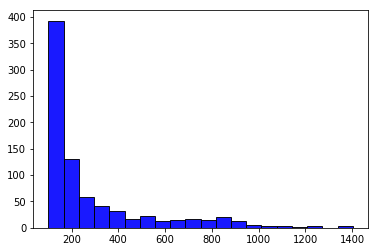

In [93]:
plt.hist(input1_obscene_larger['num_words'], bins=20, normed=0, facecolor="blue", edgecolor="black", alpha=0.9)

(array([1068., 1515., 1044.,  785.,  597.,  459.,  379.,  320.,  273.,
         180.,  194.,  139.,  141.,   98.,  114.,   70.,   73.,   78.,
          65.,   53.]),
 array([  2. ,   6.9,  11.8,  16.7,  21.6,  26.5,  31.4,  36.3,  41.2,
         46.1,  51. ,  55.9,  60.8,  65.7,  70.6,  75.5,  80.4,  85.3,
         90.2,  95.1, 100. ]),
 <a list of 20 Patch objects>)

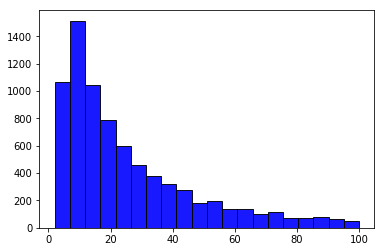

In [94]:
plt.hist(input1_obscene_less['num_words'], bins=20, normed=0, facecolor="blue", edgecolor="black", alpha=0.9)

In [95]:
len(input1_obscene_less)

7645

In [96]:
len(input1_obscene_larger)

804

In [97]:
input1_obscene_larger[['obscene','clean_comment_text','id']].to_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/input_larger_100.txt', sep='\t', index=False)

input1_obscene_less[['obscene','clean_comment_text','id']].to_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/input_less_100.txt', sep='\t', index=False)


In [98]:
colnames=['obscene', 'clean_comment_text','id'] 
obscene_less_100 = pd.read_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/out_less_100.txt', sep='\t', header=None,names=colnames)
obscene_larger_100 = pd.read_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/out_larger_100.txt', sep='\t', header=None,names=colnames)

In [99]:
len(obscene_less_100)

38225

In [100]:
len(obscene_larger_100)

7236

In [101]:
new_test_labels_obscene_larger=pd.merge(obscene_larger_100,train,how="left",on='id')
new_test_labels_obscene_less=pd.merge(obscene_less_100,train,how="left",on='id')

In [102]:
new_test_labels_obscene_larger=new_test_labels_obscene_larger.drop(['obscene_x'], axis = 1) 
new_test_labels_obscene_larger=new_test_labels_obscene_larger.drop(['clean_comment_text_y'], axis = 1) 

new_test_labels_obscene_less=new_test_labels_obscene_less.drop(['obscene_x'], axis = 1) 
new_test_labels_obscene_less=new_test_labels_obscene_less.drop(['clean_comment_text_y'], axis = 1) 

In [103]:
new_test_labels_obscene_larger=new_test_labels_obscene_larger.rename(columns={"clean_comment_text_x":"clean_comment_text"})
new_test_labels_obscene_larger=new_test_labels_obscene_larger.rename(columns={"obscene_y":"obscene"})

new_test_labels_obscene_less=new_test_labels_obscene_less.rename(columns={"clean_comment_text_x":"clean_comment_text"})
new_test_labels_obscene_less=new_test_labels_obscene_less.rename(columns={"obscene_y":"obscene"})

In [104]:
new_test_labels_obscene_less.head(3)

clean_comment_text                id  \
0            work piss around cocksucker  0002bcb3da6cb337   
1                   cocksucker piss work  0002bcb3da6cb337   
2  cocksucker cultivate piss around work  0002bcb3da6cb337   

                                   comment_text  toxic  severe_toxic  obscene  \
0  COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1             1        1   
1  COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1             1        1   
2  COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1             1        1   

   threat  insult  identity_hate  clean  ...  unique  unique_norm  ip  \
0       0       1              0      0  ...       8     0.008589  []   
1       0       1              0      0  ...       8     0.008589  []   
2       0       1              0      0  ...       8     0.008589  []   

   count_ip  link  count_links  article_id  article_id_flag  username  \
0         0    []            0          []                0        []   
1         0    []            0          []                0        []   
2         0    []            0          []                0        []   

   username_nums  
0              0  
1              0  
2              0  

[3 rows x 35 columns]

In [105]:
new_test_labels_obscene_larger.head(3)

clean_comment_text                id  \
0  gay antisemmitian archangel white slav tigerme...  001810bf8c45bf5f   
1  gay antisemmitian archangel white tigermeow gr...  001810bf8c45bf5f   
2  gay antisemmitian archangel white tigermeow gr...  001810bf8c45bf5f   

                                        comment_text  toxic  severe_toxic  \
0  You are gay or antisemmitian? \n\nArchangel WH...      1             0   
1  You are gay or antisemmitian? \n\nArchangel WH...      1             0   
2  You are gay or antisemmitian? \n\nArchangel WH...      1             0   

   obscene  threat  insult  identity_hate  clean  ...  unique  unique_norm  \
0        1       0       1              1      0  ...      88     0.106748   
1        1       0       1              1      0  ...      88     0.106748   
2        1       0       1              1      0  ...      88     0.106748   

   ip  count_ip  link  count_links  article_id  article_id_flag  username  \
0  []         0    []            0          []                0        []   
1  []         0    []            0          []                0        []   
2  []         0    []            0          []                0        []   

   username_nums  
0              0  
1              0  
2              0  

[3 rows x 35 columns]

In [144]:
input1_threat=train[train['threat']==1][['threat','id','clean_comment_text','num_words']]


input1_threat_larger=input1_threat[input1_threat['num_words']>100]
input1_threat_larger
input1_threat_less=input1_threat[input1_threat['num_words']<=100]
input1_threat_less

threat                id  \
79           1  003217c3eb469ba9   
176          1  006b94add72ed61c   
600          1  0199d6af27b715f3   
802          1  02230885017a50c5   
1017         1  02c6e41e4b317ac3   
...        ...               ...   
157718       1  e26b106943e02cbf   
158717       1  f264b7fb9a4b4f53   
158856       1  f4dca9e513e0366f   
159029       1  f780e4f42aa5a344   
159400       1  fd052883fa6a8697   

                                       clean_comment_text  num_words  
79                  hi back last warn stop undo edit die          13  
176     think fagget get oife burn hell hate sorry can...         29  
600     I am also sock puppet account suprise sincerel...         22  
802        fuck smith please notify die want dance grave          17  
1017    would not first time bitch fuck I will find li...         28  
...                                                   ...        ...  
157718  bitch fuck hore suck dick big ass hole gay fag...         62  
158717   stupid head dumb stupid die die die go suck butt         15  
158856  hey hey faggot dead yet watch mom get rap filt...         41  
159029                                   death musulmans           3  
159400  shalom semite get fuck kill son bitch do not l...         96  

[436 rows x 4 columns]

(array([21.,  6.,  1.,  3.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  2.,
         1.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([ 101. ,  166.1,  231.2,  296.3,  361.4,  426.5,  491.6,  556.7,
         621.8,  686.9,  752. ,  817.1,  882.2,  947.3, 1012.4, 1077.5,
        1142.6, 1207.7, 1272.8, 1337.9, 1403. ]),
 <a list of 20 Patch objects>)

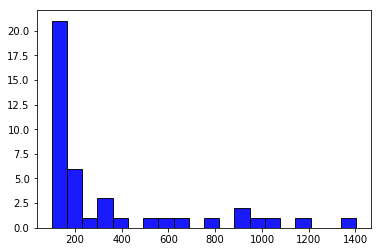

In [145]:
plt.hist(input1_threat_larger['num_words'], bins=20, normed=0, facecolor="blue", edgecolor="black", alpha=0.9)

(array([37., 79., 68., 52., 45., 27., 23., 19., 15., 15., 11.,  4., 11.,
         3.,  4.,  4.,  2.,  6.,  6.,  5.]),
 array([  3.  ,   7.85,  12.7 ,  17.55,  22.4 ,  27.25,  32.1 ,  36.95,
         41.8 ,  46.65,  51.5 ,  56.35,  61.2 ,  66.05,  70.9 ,  75.75,
         80.6 ,  85.45,  90.3 ,  95.15, 100.  ]),
 <a list of 20 Patch objects>)

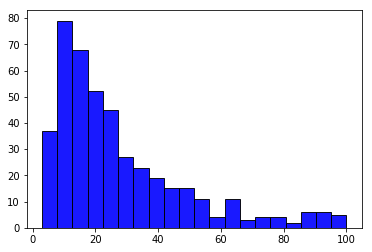

In [146]:
plt.hist(input1_threat_less['num_words'], bins=20, normed=0, facecolor="blue", edgecolor="black", alpha=0.9)

In [148]:
input1_threat_larger[['threat','clean_comment_text','id']].to_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/input_larger_100.txt', sep='\t', index=False)

input1_threat_less[['threat','clean_comment_text','id']].to_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/input_less_100.txt', sep='\t', index=False)



In [150]:
colnames=['threat', 'clean_comment_text','id'] 
threat_less_100 = pd.read_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/out_less_100.txt', sep='\t', header=None,names=colnames)
threat_larger_100 = pd.read_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/out_larger_100.txt', sep='\t', header=None,names=colnames)

In [151]:
len(threat_less_100)

2180

In [152]:
len(threat_larger_100)

378

In [153]:
new_test_labels_threat_larger=pd.merge(threat_larger_100,train,how="left",on='id')
new_test_labels_threat_less=pd.merge(threat_less_100,train,how="left",on='id')

In [154]:
new_test_labels_threat_larger=new_test_labels_threat_larger.drop(['threat_x'], axis = 1) 
new_test_labels_threat_larger=new_test_labels_threat_larger.drop(['clean_comment_text_y'], axis = 1) 

new_test_labels_threat_less=new_test_labels_threat_less.drop(['threat_x'], axis = 1) 
new_test_labels_threat_less=new_test_labels_threat_less.drop(['clean_comment_text_y'], axis = 1) 

In [155]:
new_test_labels_threat_larger=new_test_labels_threat_larger.rename(columns={"clean_comment_text_x":"clean_comment_text"})
new_test_labels_threat_larger=new_test_labels_threat_larger.rename(columns={"threat_y":"threat"})

new_test_labels_threat_less=new_test_labels_threat_less.rename(columns={"clean_comment_text_x":"clean_comment_text"})
new_test_labels_threat_less=new_test_labels_threat_less.rename(columns={"threat_y":"threat"})

In [156]:
new_test_labels_threat_less.head(3)

clean_comment_text                id  \
0  hi back last warn stop undo edit die out  003217c3eb469ba9   
1      hi back last warn stop undo edit die  003217c3eb469ba9   
2      hi back last warn stop undo edit die  003217c3eb469ba9   

                                        comment_text  toxic  severe_toxic  \
0  Hi! I am back again!\nLast warning!\nStop undo...      1             0   
1  Hi! I am back again!\nLast warning!\nStop undo...      1             0   
2  Hi! I am back again!\nLast warning!\nStop undo...      1             0   

   obscene  threat  insult  identity_hate  clean  ...  unique  unique_norm  \
0        0       1       0              0      0  ...      13     0.014724   
1        0       1       0              0      0  ...      13     0.014724   
2        0       1       0              0      0  ...      13     0.014724   

   ip  count_ip  link  count_links  article_id  article_id_flag  username  \
0  []         0    []            0          []                0        []   
1  []         0    []            0          []                0        []   
2  []         0    []            0          []                0        []   

   username_nums  
0              0  
1              0  
2              0  

[3 rows x 35 columns]

In [157]:
input1_insult=train[train['insult']==1][['insult','id','clean_comment_text','num_words']]

input1_insult_larger=input1_insult[input1_insult['num_words']>100]
input1_insult_larger
input1_insult_less=input1_insult[input1_insult['num_words']<=100]
input1_insult_less

insult                id  \
6            1  0002bcb3da6cb337   
43           1  00190820581d90ce   
55           1  0020e7119b96eeeb   
56           1  0020fd96ed3b8c8b   
65           1  0028d62e8a5629aa   
...        ...               ...   
159411       1  fd2f53aafe8eefcc   
159493       1  fef142420a215b90   
159514       1  ff39a2895fc3b40e   
159541       1  ffa33d3122b599d6   
159554       1  ffbdbb0483ed0841   

                                       clean_comment_text  num_words  
6                             cocksucker piss around work          8  
43                            fuck filthy mother ass dry           8  
55      stupid peace shit stop delete stuff asshole go...         19  
56        tony sidaway obviously fistfuckee love arm ass          13  
65      edit good cunts like revert good edit you are ...         55  
...                                                   ...        ...  
159411  fat piece shit obese piece shit think naked la...         19  
159493                                fuck faggot lolwat           3  
159514                            mischievious pubic hair          6  
159541  absurd edit absurd edit great white shark tota...         58  
159554  I am go keep post stuff u delete fuck site clo...         35  

[7181 rows x 4 columns]

(array([355., 108.,  49.,  36.,  18.,  12.,  18.,   7.,  11.,  16.,  14.,
         16.,  15.,   6.,   3.,   6.,   0.,   4.,   0.,   2.]),
 array([ 101. ,  166.1,  231.2,  296.3,  361.4,  426.5,  491.6,  556.7,
         621.8,  686.9,  752. ,  817.1,  882.2,  947.3, 1012.4, 1077.5,
        1142.6, 1207.7, 1272.8, 1337.9, 1403. ]),
 <a list of 20 Patch objects>)

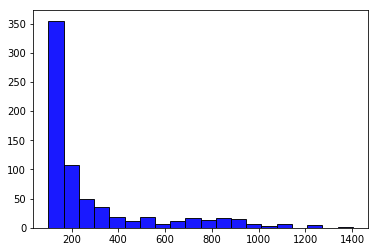

In [158]:
plt.hist(input1_insult_larger['num_words'], bins=20, normed=0, facecolor="blue", edgecolor="black", alpha=0.9)

(array([ 961., 1372.,  994.,  746.,  585.,  445.,  367.,  307.,  271.,
         158.,  184.,  132.,  139.,  104.,  102.,   68.,   72.,   71.,
          57.,   46.]),
 array([  2. ,   6.9,  11.8,  16.7,  21.6,  26.5,  31.4,  36.3,  41.2,
         46.1,  51. ,  55.9,  60.8,  65.7,  70.6,  75.5,  80.4,  85.3,
         90.2,  95.1, 100. ]),
 <a list of 20 Patch objects>)

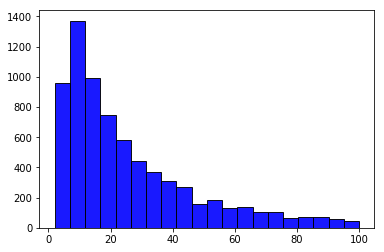

In [159]:
plt.hist(input1_insult_less['num_words'], bins=20, normed=0, facecolor="blue", edgecolor="black", alpha=0.9)

In [160]:
input1_insult_larger[['insult','clean_comment_text','id']].to_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/input_larger_100.txt', sep='\t', index=False)

input1_insult_less[['insult','clean_comment_text','id']].to_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/input_less_100.txt', sep='\t', index=False)



In [161]:
# len(new_test_labels_obscene_larger)+len(new_test_labels_obscene_less)+len(new_test_labels_severe_toxic_larger)+len(new_test_labels_severe_toxic_less)+len(new_test_labels_toxic_larger)+len(new_test_labels_toxic_less)

In [162]:
colnames=['insult', 'clean_comment_text','id'] 
insult_less_100 = pd.read_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/out_less_100.txt', sep='\t', header=None,names=colnames)
insult_larger_100 = pd.read_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/out_larger_100.txt', sep='\t', header=None,names=colnames)

In [163]:
new_test_labels_insult_larger=pd.merge(insult_larger_100,train,how="left",on='id')
new_test_labels_insult_less=pd.merge(insult_less_100,train,how="left",on='id')

In [164]:
new_test_labels_insult_larger=new_test_labels_insult_larger.drop(['insult_x'], axis = 1) 
new_test_labels_insult_larger=new_test_labels_insult_larger.drop(['clean_comment_text_y'], axis = 1) 

new_test_labels_insult_less=new_test_labels_insult_less.drop(['insult_x'], axis = 1) 
new_test_labels_insult_less=new_test_labels_insult_less.drop(['clean_comment_text_y'], axis = 1) 

In [165]:
new_test_labels_insult_larger=new_test_labels_insult_larger.rename(columns={"clean_comment_text_x":"clean_comment_text"})
new_test_labels_insult_larger=new_test_labels_insult_larger.rename(columns={"insult_y":"insult"})

new_test_labels_insult_less=new_test_labels_insult_less.rename(columns={"clean_comment_text_x":"clean_comment_text"})
new_test_labels_insult_less=new_test_labels_insult_less.rename(columns={"insult_y":"insult"})

In [166]:
new_test_labels_insult_less.head(3)

clean_comment_text                id  \
0           work piss around cocksucker  0002bcb3da6cb337   
1                  cocksucker piss work  0002bcb3da6cb337   
2  cocksucker function piss around work  0002bcb3da6cb337   

                                   comment_text  toxic  severe_toxic  obscene  \
0  COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1             1        1   
1  COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1             1        1   
2  COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1             1        1   

   threat  insult  identity_hate  clean  ...  unique  unique_norm  ip  \
0       0       1              0      0  ...       8     0.008589  []   
1       0       1              0      0  ...       8     0.008589  []   
2       0       1              0      0  ...       8     0.008589  []   

   count_ip  link  count_links  article_id  article_id_flag  username  \
0         0    []            0          []                0        []   
1         0    []            0          []                0        []   
2         0    []            0          []                0        []   

   username_nums  
0              0  
1              0  
2              0  

[3 rows x 35 columns]

In [167]:
input1_identity_hate=train[train['identity_hate']==1][['identity_hate','id','clean_comment_text','num_words']]

input1_identity_hate_larger=input1_identity_hate[input1_identity_hate['num_words']>100]
input1_identity_hate_larger
input1_identity_hate_less=input1_identity_hate[input1_identity_hate['num_words']<=100]
input1_identity_hate_less

identity_hate                id  \
105                 1  00472b8e2d38d1ea   
176                 1  006b94add72ed61c   
218                 1  008e0818dde894fb   
238                 1  0097dd5c29bf7a15   
429                 1  01166f26ee280e56   
...               ...               ...   
159239              1  fab1d401d504cf68   
159281              1  fb726deec64157bd   
159336              1  fc3efa2f6f025f6d   
159400              1  fd052883fa6a8697   
159449              1  fdce660ddcd6d7ca   

                                       clean_comment_text  num_words  
105                 pair jew hating weiner nazi schmucks           7  
176     think fagget get oife burn hell hate sorry can...         29  
218     kill niggers hard others say include racists s...         20  
238     u r tw fuck u gay boy u r smelly fuck ur mum p...         14  
429     gay existence cdvf proof sad twat also ugly wi...         25  
...                                                   ...        ...  
159239  whats gook whats asian gook chink man hoe chow...         37  
159281  lol you are gay never know good feel fuck woma...         18  
159336  oh fuck pansy jew would whine b nai brith beat...         22  
159400  shalom semite get fuck kill son bitch do not l...         96  
159449                                     think gay fag           7  

[1257 rows x 4 columns]

(array([64., 32., 12.,  6.,  6.,  3.,  2.,  2.,  2.,  0.,  5.,  2.,  6.,
         1.,  2.,  1.,  0.,  0.,  0.,  2.]),
 array([ 102.  ,  159.25,  216.5 ,  273.75,  331.  ,  388.25,  445.5 ,
         502.75,  560.  ,  617.25,  674.5 ,  731.75,  789.  ,  846.25,
         903.5 ,  960.75, 1018.  , 1075.25, 1132.5 , 1189.75, 1247.  ]),
 <a list of 20 Patch objects>)

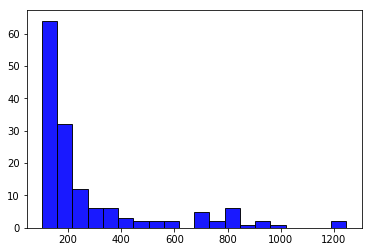

In [168]:
plt.hist(input1_identity_hate_larger['num_words'], bins=20, normed=0, facecolor="blue", edgecolor="black", alpha=0.9)

(array([64., 32., 12.,  6.,  6.,  3.,  2.,  2.,  2.,  0.,  5.,  2.,  6.,
         1.,  2.,  1.,  0.,  0.,  0.,  2.]),
 array([ 102.  ,  159.25,  216.5 ,  273.75,  331.  ,  388.25,  445.5 ,
         502.75,  560.  ,  617.25,  674.5 ,  731.75,  789.  ,  846.25,
         903.5 ,  960.75, 1018.  , 1075.25, 1132.5 , 1189.75, 1247.  ]),
 <a list of 20 Patch objects>)

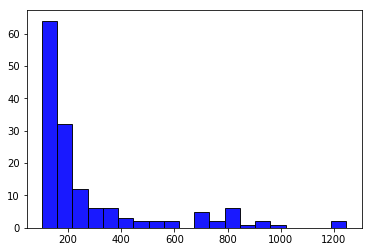

In [169]:
plt.hist(input1_identity_hate_larger['num_words'], bins=20, normed=0, facecolor="blue", edgecolor="black", alpha=0.9)

In [171]:
input1_identity_hate_larger[['identity_hate','clean_comment_text','id']].to_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/input_larger_100.txt', sep='\t', index=False)
input1_identity_hate_less[['identity_hate','clean_comment_text','id']].to_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/input_less_100.txt', sep='\t', index=False)


In [172]:
colnames=['identity_hate', 'clean_comment_text','id'] 
identity_hate_less = pd.read_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/out_less_100.txt', sep='\t', header=None,names=colnames)
identity_hate_larger = pd.read_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/out_larger_100.txt', sep='\t', header=None,names=colnames)

In [174]:
new_test_labels_identity_hate_larger=pd.merge(identity_hate_larger,train,how="left",on='id')
new_test_labels_identity_hate_less=pd.merge(identity_hate_less,train,how="left",on='id')

In [175]:
new_test_labels_identity_hate_larger=new_test_labels_identity_hate_larger.drop(['identity_hate_x'], axis = 1) 
new_test_labels_identity_hate_larger=new_test_labels_identity_hate_larger.drop(['clean_comment_text_y'], axis = 1) 

new_test_labels_identity_hate_less=new_test_labels_identity_hate_less.drop(['identity_hate_x'], axis = 1) 
new_test_labels_identity_hate_less=new_test_labels_identity_hate_less.drop(['clean_comment_text_y'], axis = 1) 

In [176]:
new_test_labels_identity_hate_larger=new_test_labels_identity_hate_larger.rename(columns={"clean_comment_text_x":"clean_comment_text"})
new_test_labels_identity_hate_larger=new_test_labels_identity_hate_larger.rename(columns={"identity_hate_y":"identity_hate"})

new_test_labels_identity_hate_less=new_test_labels_identity_hate_less.rename(columns={"clean_comment_text_x":"clean_comment_text"})
new_test_labels_identity_hate_less=new_test_labels_identity_hate_less.rename(columns={"identity_hate_y":"identity_hate"})

In [177]:
len(new_test_labels_identity_hate_larger)+len(new_test_labels_identity_hate_less)+len(new_test_labels_insult_larger)+len(new_test_labels_insult_less)+len(new_test_labels_obscene_larger)+len(new_test_labels_obscene_less)+len(new_test_labels_severe_toxic_larger)+len(new_test_labels_severe_toxic_less)+len(new_test_labels_threat_larger)+len(new_test_labels_threat_less)+len(new_test_labels_toxic_larger)+len(new_test_labels_toxic_less)


161784

In [178]:
len(train[train['clean']==1])

143346

In [179]:
new_test_labels_identity_hate_larger,new_test_labels_identity_hate_less,len(new_test_labels_insult_larger)+len(new_test_labels_insult_less)+len(new_test_labels_obscene_larger)+len(new_test_labels_obscene_less)+len(new_test_labels_severe_toxic_larger)+len(new_test_labels_severe_toxic_less)+len(new_test_labels_threat_larger)+len(new_test_labels_threat_less)+len(new_test_labels_toxic_larger)+len(new_test_labels_toxic_less)


combination=[new_test_labels_identity_hate_larger,new_test_labels_identity_hate_less,new_test_labels_insult_larger,new_test_labels_insult_less,new_test_labels_obscene_larger,new_test_labels_obscene_less,new_test_labels_severe_toxic_larger,new_test_labels_severe_toxic_less,new_test_labels_threat_larger,new_test_labels_threat_less,new_test_labels_toxic_larger,new_test_labels_toxic_less]
result=pd.concat(combination)

In [180]:
len(result)

161784

In [182]:
result.to_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/eda_train.csv', index=False)


In [183]:
clean_train=train[train['clean']==1]

In [184]:
train_eda=pd.concat([result,clean_train])

/Users/jixusheng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [187]:
train_eda.to_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/eda_train.txt', index=False)

In [189]:
train_eda.columns

Index(['article_id', 'article_id_flag', 'clean', 'clean_comment_text',
       'comment_text', 'count_ip', 'count_links', 'id', 'identity_hate',
       'insult', 'ip', 'label_num', 'link', 'num_char', 'num_char_norm',
       'num_words', 'num_words_norm', 'obscene', 'punctuation',
       'punctuation_norm', 'sent_num', 'sent_num_norm', 'severe_toxic',
       'stop_words', 'stop_words_norm', 'threat', 'title', 'title_norm',
       'toxic', 'unique', 'unique_norm', 'upper', 'upper_norm', 'username',
       'username_nums'],
      dtype='object')

In [191]:
train.to_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/non_eda_train.txt', index=False)

In [190]:
train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'clean', 'label_num', 'sent_num',
       'sent_num_norm', 'num_words', 'num_words_norm', 'num_char',
       'num_char_norm', 'stop_words', 'stop_words_norm', 'punctuation',
       'punctuation_norm', 'upper', 'upper_norm', 'title', 'title_norm',
       'unique', 'unique_norm', 'ip', 'count_ip', 'link', 'count_links',
       'article_id', 'article_id_flag', 'username', 'username_nums',
       'clean_comment_text'],
      dtype='object')

In [192]:
new_test_labels.columns

Index(['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate', 'comment_text', 'sent_num', 'sent_num_norm',
       'num_words', 'num_words_norm', 'num_char', 'num_char_norm',
       'stop_words', 'stop_words_norm', 'punctuation', 'punctuation_norm',
       'upper', 'upper_norm', 'title', 'title_norm', 'unique', 'unique_norm',
       'ip', 'count_ip', 'link', 'count_links', 'article_id',
       'article_id_flag', 'username', 'username_nums', 'clean_comment_text'],
      dtype='object')

In [195]:
new_test_labels.to_csv('/Users/jixusheng/Documents/kaggle/eda_nlp-master/new_test_labels.txt', index=False)

Index(['article_id', 'article_id_flag', 'clean', 'clean_comment_text',
       'comment_text', 'count_ip', 'count_links', 'id', 'identity_hate',
       'insult', 'ip', 'label_num', 'link', 'num_char', 'num_char_norm',
       'num_words', 'num_words_norm', 'obscene', 'punctuation',
       'punctuation_norm', 'sent_num', 'sent_num_norm', 'severe_toxic',
       'stop_words', 'stop_words_norm', 'threat', 'title', 'title_norm',
       'toxic', 'unique', 'unique_norm', 'upper', 'upper_norm', 'username',
       'username_nums'],
      dtype='object')